### <font color='red'> Project 2 : Buzz Prediction on Twitter

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.
- Deciding which dataset is for which task is part of the project.
- Read data into Jupyter notebook, use pandas to import data into a data frame.
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

Classification Task:
- Decide about a good evaluation strategy and justify your choice.
- Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support Vector Machine, Decision Tree. 
- Which model gives the best results?

Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Rename notebook with your group number and submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged.

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- There is a high possibility that your classmate has also faced the same problem and knows the solution. So this is an effort to encourage collaborative learning, reducing mails for frequently asked queries and also making all the information available to everyone.
- Please check existing threads for your query before creating a new one. It goes without saying that do not share your code or complete solutions there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [118]:
import pandas as pd
df = pd.read_table('Twitter.data',sep=',',header=None)

In [119]:
df10 = df.sample(frac=0.025,random_state=6).reset_index().iloc[:,1:]

In [120]:
df10.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,2,3,5,0,0,3,9,1,1,4,...,1.000000,1.000000,2,3,5,0,0,3,9,1.5
1,57,35,167,137,149,188,224,31,2,95,...,1.031915,1.084821,57,35,167,137,149,188,224,178.0
2,4,0,1,1,1,0,7,2,0,1,...,0.000000,1.000000,4,0,1,1,1,0,7,0.0
3,372,375,1170,1398,1061,953,940,56,87,287,...,1.032495,1.022340,372,376,1170,1400,1062,954,940,424.5
4,1,0,0,1,4,3,1,1,0,0,...,1.000000,1.000000,1,0,0,1,4,3,1,1.0


In [121]:
df10.describe()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
count,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,...,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000
mean,139.170839,134.184144,158.368425,180.810370,200.286537,219.115013,216.830327,69.981071,68.167684,81.060970,...,1.128199,1.146799,139.617859,134.593649,158.784377,181.264865,200.781634,219.647075,217.385776,189.974419
std,450.792537,420.935008,516.901239,619.694767,635.418534,662.569868,662.520789,195.576297,191.856543,248.077913,...,1.018674,1.921530,451.681254,421.756142,517.711512,620.412832,636.318864,663.477446,663.385312,608.074378
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,5.000000
50%,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,31.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,32.000000,26.000000
75%,106.000000,100.000000,117.000000,132.000000,148.000000,171.000000,167.000000,61.000000,57.000000,65.000000,...,1.090909,1.092643,106.000000,100.000000,118.000000,133.000000,149.000000,171.000000,167.000000,140.000000
max,17167.000000,12565.000000,16601.000000,25660.000000,19810.000000,21114.000000,21498.000000,7883.000000,8291.000000,10324.000000,...,67.190475,171.000000,17201.000000,12568.000000,16601.000000,25670.000000,19815.000000,21124.000000,21502.000000,18807.000000


In [122]:
%matplotlib inline
import matplotlib.pyplot as plt

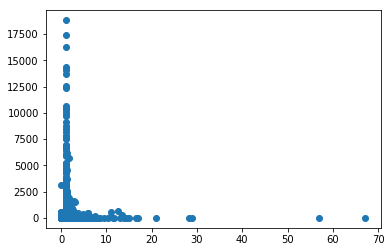

In [123]:
plt.plot(df10[68],df10[77],'o')

In [124]:
from scipy import stats
import numpy as np

In [125]:
scipy.stats.skew(df10[68])

35.5835595943972

In [126]:
# from numpy import seterr,isneginf,array
# seterr(divide='ignore')
# df10[0].apply(np.log)

In [127]:
X = df10.iloc[:,:77]
y = df10[77]

In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [129]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,random_state=6)
sc = StandardScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org)


c:\users\achin\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\achin\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\achin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [130]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(10935, 77) (3646, 77) (10935,) (3646,)


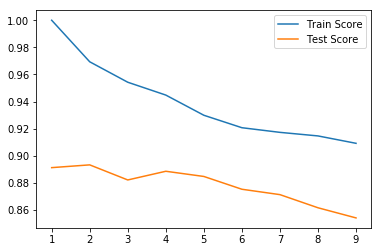

In [133]:
%matplotlib inline
train_array=[]
test_array=[]
x = range(1,10)
for k in x:
    knnreg = KNeighborsRegressor(k)
    knnreg.fit(X_train,y_train)
    train_array.append(knnreg.score(X_train,y_train))
    test_array.append(knnreg.score(X_test,y_test))

plt.plot(x,train_array,label='Train Score')
plt.plot(x,test_array,label='Test Score')
plt.legend()

In [117]:
pd.DataFrame(train_array,test_array)

,0
0.882708,0.999999
0.909249,0.974387
0.917627,0.963638
0.927642,0.957114
0.925114,0.949990
0.925289,0.944067
0.921691,0.941070
0.918288,0.937888
0.915228,0.933414
